## SEIR epidemiological model - Susceptible, Exposed, Infected, Recovered

In [43]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import json

!jupyter nbconvert --to script SEI_GPD.ipynb

[NbConvertApp] Converting notebook SEI_GPD.ipynb to script
[NbConvertApp] Writing 1951 bytes to SEI_GPD.py


In [26]:
df = gpd.read_file("shape_files/merge/Rhone_Alpes.geojson")
df.columns

Index(['y_chf_lieu', 'y_centroid', 'code_comm', 'nom_dept', 'statut',
       'code_reg', 'nom_region', 'z_moyen', 'insee_com', 'code_dept',
       'nom_comm', 'id_geofla', 'x_chf_lieu', 'code_cant', 'superficie',
       'x_centroid', 'code_arr', 'population', 'geometry'],
      dtype='object')

In [12]:

def plot(df):
    fig, ax = plt.subplots()
    fig.set_size_inches(50, 50, forward=True)# Base layer with all the areas for the background
    df.centroid.plot(ax=ax, color ="green")
    df.boundary.plot(ax=ax, color ="blue")
    
    return plt.show()

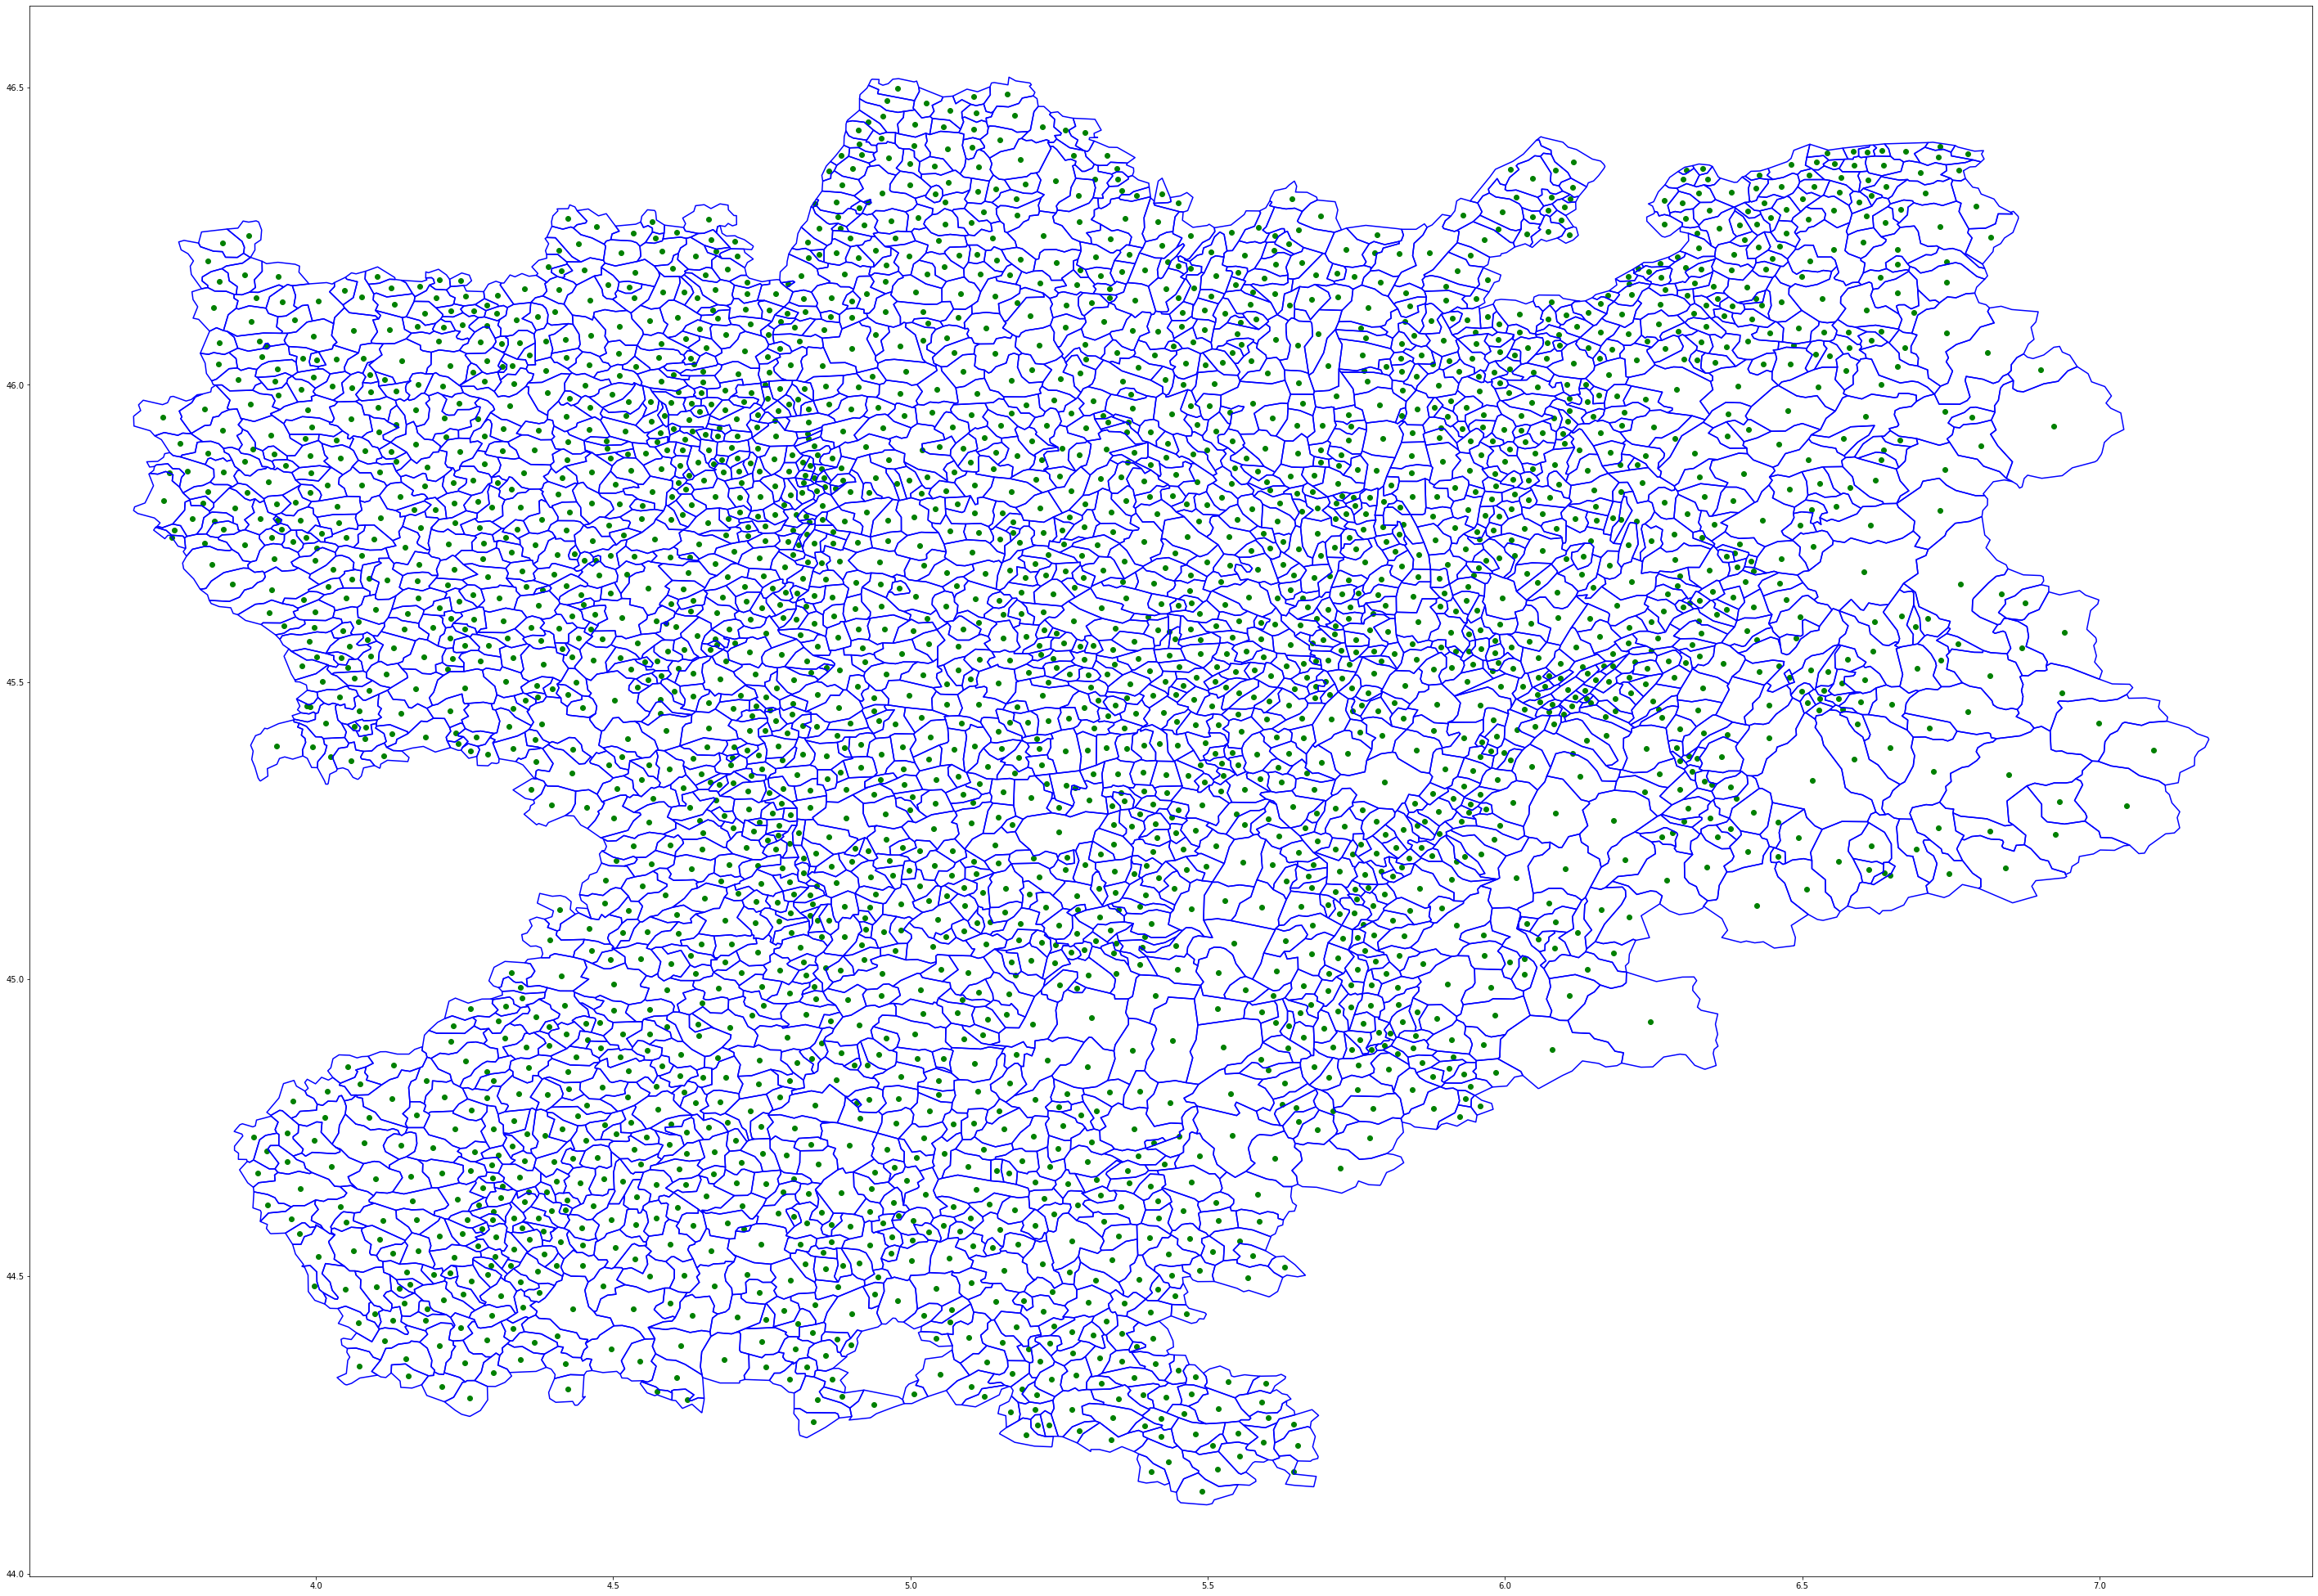

In [13]:
plot(df)

In [41]:
#count town of the departement
count_town = list(set(df["nom_comm"]))
print(len(count_town))

# indexing geodataframe

print(df.loc[669, "nom_comm"])

2844
SAINT-DIDIER-SUR-ROCHEFORT


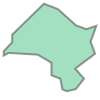

In [42]:
df["geometry"][669]

## Bibliographie

In [6]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [23]:
# Define parameters
t_max = 200 
dt = .1 
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000 
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho = 0.7
params = alpha, beta, gamma, rho
# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t).tolist()

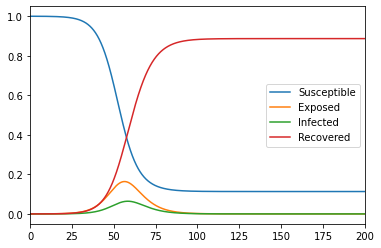

In [25]:
new_df = pd.DataFrame(results)
new_df.columns = ['Susceptible', "Exposed", "Infected", "Recovered"]
new_df.index = new_df.index*.1
new_df.plot()
plt.legend()
plt.show()